## **TME 4 - Perceptron**

Membres du binôme :
- KRISNI Almehdi (3800519)
- ARICHANDRA Santhos (3802651)

Afin de réaliser ce TME, nous allons avoir besoin des fonctions codées dans le TME 3. On commence donc par importer tout ce dont on à besoin dans le fichier *tme4.py*.

In [1]:
# On importe le fichier tme4.py
from tme4 import *

# Rechargement automatique des fichiers importés (vu dans l'UE de Data Science en L3)
%load_ext autoreload
%autoreload 2

### **Perceptron et classe Linéaire**

On implémente dans un premier temps la fonctions **perceptron_loss(w,x,y)** et son gradient **perceptron_grad(w,x,y)**.<br/>Le coût d'un Perceptron est le maximum entre 0 et *(-y * <x.w>)*.<br/>Lors de la descente de gradient, on ne réalise une correction que sur les exemples mal classés, soit les exemples pour lesquels on a la valeur*(y * <x.w>)*  négative.

On complète également le squelette de la classe Linéaire en y mettant à jour :
- **predict(self,datax)** inférant le label des données datax
- **score(self,datax,datay)** permettant de calculer le pourcentage de bonne classification
- **fit(self,datax,datay)** réalisant la descente de gradient pendant *max_iter* itérations avec un pas *eps* en utilisant le coût **loss** et le gradient **loss_g**

### **Données USPS**

Dans le cadre du TME, nous avons à notre disposition 2 fichiers données USPS se situant dans le dossier *data*.
<br/>Il s'agit d'un ensemble de données d'apprentissage et d'un ensemble de données test.

On commence par charger et afficher ces données.

Les données sont de dimensions : (7291, 256)
Classe de la donnée affichée dans l'ordre des images - 3
Classe de la donnée affichée dans l'ordre des images - 9
Classe de la donnée affichée dans l'ordre des images - 1
Classe de la donnée affichée dans l'ordre des images - 8
Classe de la donnée affichée dans l'ordre des images - 8


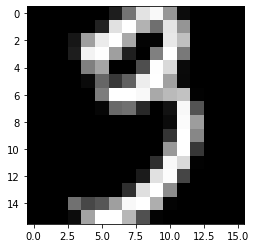

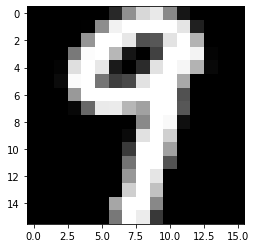

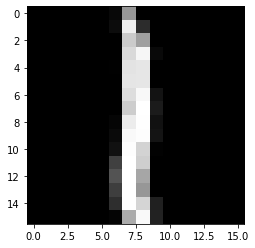

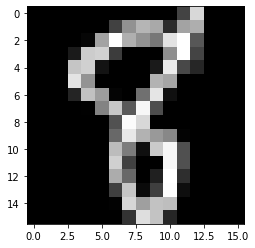

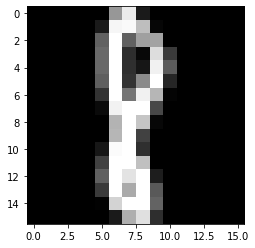

In [2]:
# Chargement et affichage des données USPS
dataxapp, datayapp = load_usps("data/USPS_train.txt")
dataxtest, dataytest = load_usps("data/USPS_test.txt")

# On affiche les dimensions des données
print("Les données sont de dimensions :", dataxapp.shape)

# On affiche la représentation image des données
for i in [np.random.randint(0, len(datayapp)) for _ in range(5)] :
    plt.figure() # Pour pouvoir affiche plusieurs images, sinon uniquement la dernière sera affichée
    show_usps(dataxapp[i])
    print("Classe de la donnée affichée dans l'ordre des images -", datayapp[i])

On isole les exemples de label 6 et les exemples de label 9 comme demandé dans le sujet du TME, puis on entraîne un Perceptron sur ces ensembles.

In [11]:
# Isolation des 6 (négatif) et des 9 (positif) avec get_usps
Xapp, Yapp = get_usps([6,9], dataxapp, datayapp)
Xtest, Ytest = get_usps([6,9], dataxtest, dataytest)

# On transforme les labels 6 en -1 et les labels 9 en +1
Yapp = np.where(Yapp == 6, -1, Yapp)
Yapp = np.where(Yapp == 9, 1, Yapp)

Ytest = np.where(Ytest == 6, -1, Ytest)
Ytest = np.where(Ytest == 9, 1, Ytest)

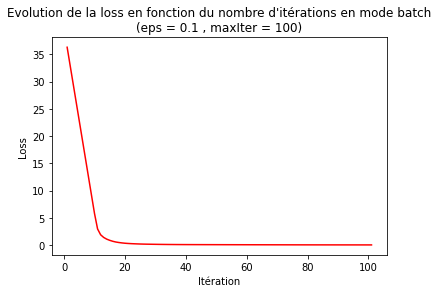

Précision du Perceptron sur les données d'apprentissage : 0.985474006116208
Précision du Perceptron sur les données de test : 0.9855907780979827


In [12]:
# Création du Perceptron et apprentissage
p69 = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, eps=0.1)
p69.fit(Xapp, Yapp, doPlot=True)

# Affichage des précisions sur les ensembles d'apprentissage et de test
print("Précision du Perceptron sur les données d'apprentissage :", p69.score(Xapp, Yapp))
print("Précision du Perceptron sur les données de test :", p69.score(Xtest, Ytest))

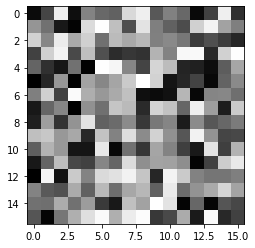

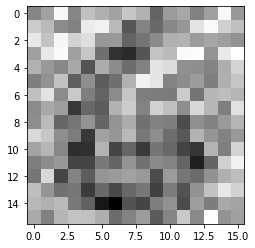

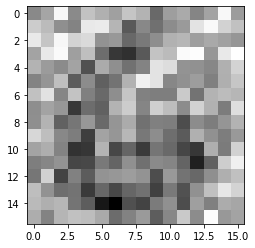

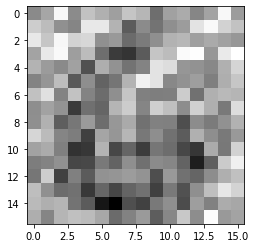

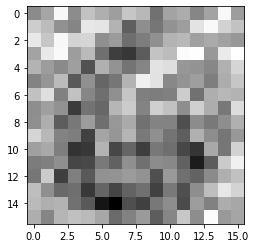

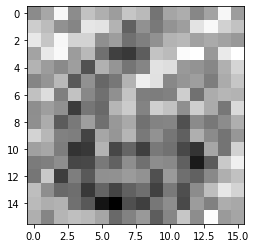

In [13]:
# On affiche l'évolution des poids de w
# On affiche le w initial et pendant les itérations avec les modifications apportées aux poids
for i in range(len(p69.wLog)) :
    if (i % ((len(p69.wLog) - 1) / 5) == 0) :
        plt.figure()
        show_usps(np.array(p69.wLog[i]))

On remarque qu'à la fin de la descente de gradient, les poids de w se renforcent à certains endroits. On arrive à reconnaître la forme du chiffre 6 sur l'affichage des poids de w lors de la dernière itération.

(PS. Les poids de w ont été initialisés aléatoirement, sinon on reste avec un vecteur w constamment nul au fur et à mesure des itérations si il est initalisé à 0 sur tout ses poids. La valeur de epsilon a également été augmentée à 0.1 sinon on n'obtient pas de convergence de w de telle sorte à ce que les poids représentent le chiffre 6.)

On essaye cette fois-çi une comparaison des exemples de la classe 6 contre le reste des exemples.

In [14]:
# Isolation des 6 (négatif) et des non 6 (positif) avec get_usps
Xapp, Yapp = dataxapp, datayapp
Xtest, Ytest = dataxtest, dataytest

# On transforme les labels 6 en -1 et les labels restants en +1
Yapp = np.where(Yapp == 6, -1, Yapp)
Yapp = np.where(Yapp != (-1), 1, Yapp)

Ytest = np.where(Ytest == 6, -1, Ytest)
Ytest = np.where(Ytest != (-1), 1, Ytest)

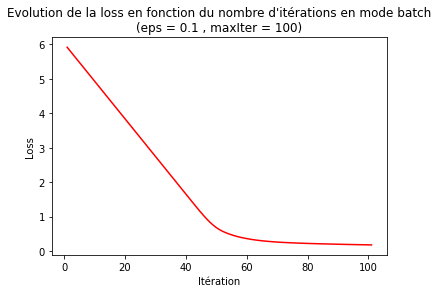

Précision du Perceptron sur les données d'apprentissage : 0.9651625291455219
Précision du Perceptron sur les données de test : 0.9636273044344793


In [15]:
# Création du Perceptron et apprentissage
p6all = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, eps=0.1)
p6all.fit(Xapp, Yapp, doPlot=True)

# Affichage des précisions sur les ensembles d'apprentissage et de test
print("Précision du Perceptron sur les données d'apprentissage :", p6all.score(Xapp, Yapp))
print("Précision du Perceptron sur les données de test :", p6all.score(Xtest, Ytest))

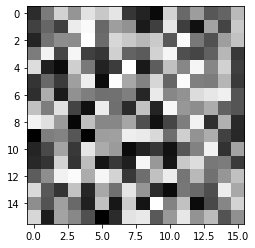

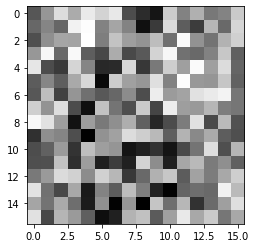

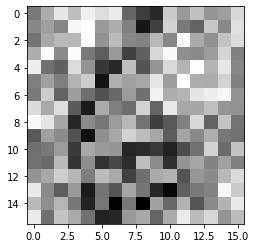

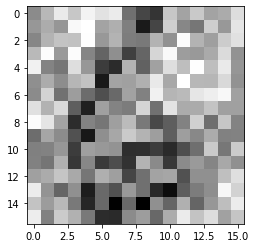

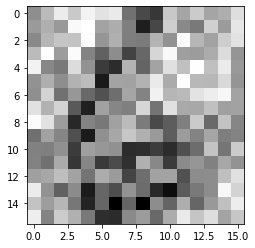

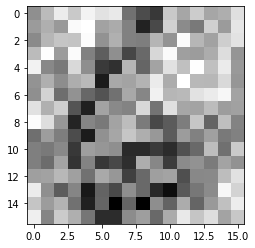

In [16]:
# On affiche l'évolution des poids de w
# On affiche le w initial et pendant les itérations avec les modifications apportées aux poids
for i in range(len(p6all.wLog)) :
    if (i % ((len(p6all.wLog) - 1) / 5) == 0) :
        plt.figure()
        show_usps(np.array(p6all.wLog[i]))

On remarque premièrement une légère chute au niveau de la précision moyenne du Perceptron, que ce soit sur les données d'apprentissage ou de test. Cependant, lors de l'itération finale, l'affichage des poids du vecteur w nous montre une nouvelle fois un renforcement des poids significatifs pour l'affichage du chiffre 6.

Donc que ce soit en 6 Versus All ou en 6 Versus 9, le Perceptron parvient toujours à arriver à un vecteur de poids w permettant une classification pas parfaite mais correcte des exemples représentant le chiffre 6.

### **Mini-batch et descente stochastique**

On modifie désormais la fonction **fit** afin qu'elle puisse effectue la descente de gradient de différentes manières en fonction de notre choix. On ajoute alors un paramètre *mode*, étant par défaut sur "batch", allant nous permettre de choisir le mode que l'on souhaite utiliser pour l'apprentissage.

Les 3 valeurs de *mode* acceptées sont donc :
- "batch"
- "stoch"
- "mini"

On ajoute également un paramètre *part* dont la valeur ne sera utilisée que lors d'une descente de gradient en mode mini-batch, et sa valeur par défaut est de 10, ainsi que le pramètre *doPlot*, allant préciser si on souhaite un affichage de l'évolution de la loss, qui est par défaut à False.

Aayant déjà codé les différentes descentes de gradient pendant le TME 3, on utilise les fonctions présentes dans le fichier *tme3_for_tme4*.

On effectue les mêmes expériences que dans la partie précédente mais en utilisant cette fois-çi des modes de descente de gradient différents.

### **6 Versus 9 - Mode stochastique**

In [17]:
# Isolation des 6 (négatif) et des 9 (positif) avec get_usps
Xapp, Yapp = get_usps([6,9], dataxapp, datayapp)
Xtest, Ytest = get_usps([6,9], dataxtest, dataytest)

# On transforme les labels 6 en -1 et les labels 9 en +1
Yapp = np.where(Yapp == 6, -1, Yapp)
Yapp = np.where(Yapp == 9, 1, Yapp)

Ytest = np.where(Ytest == 6, -1, Ytest)
Ytest = np.where(Ytest == 9, 1, Ytest)

In [20]:
# Création du Perceptron et apprentissage
p69s = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, eps=0.1)
p69s.fit(Xapp, Yapp, mode="stoch")

# Affichage des précisions sur les ensembles d'apprentissage et de test
print("Précision du Perceptron sur les données d'apprentissage :", p69s.score(Xapp, Yapp))
print("Précision du Perceptron sur les données de test :", p69s.score(Xtest, Ytest))

Précision du Perceptron sur les données d'apprentissage : 1.0
Précision du Perceptron sur les données de test : 0.9971181556195965


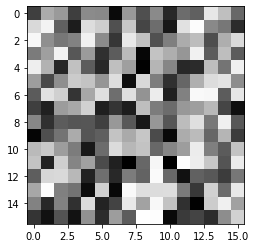

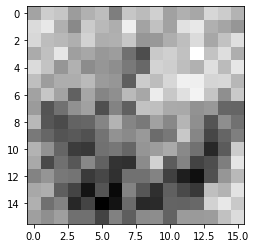

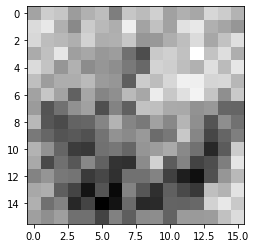

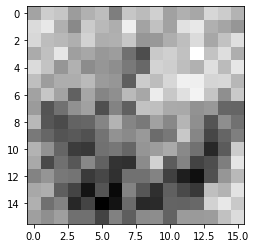

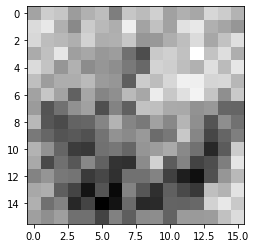

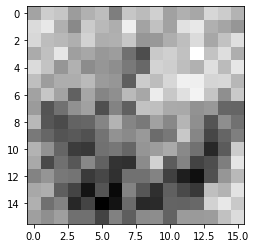

In [21]:
# On affiche l'évolution des poids de w
# On affiche le w initial et pendant les itérations avec les modifications apportées aux poids
for i in range(len(p69s.wLog)) :
    if (i % ((len(p69s.wLog) - 1) / 5) == 0) :
        plt.figure()
        show_usps(np.array(p69s.wLog[i]))

On peut interpréter l'affichage des poids de w à l'itération finale de manière très simple. Le 6 et le 9 étant des formes similaires, dont la principale différence étant le fait que la boucle se situe sois en bas (pour le chiffre 6), soit en haut (pour le chiffre 9), on remarque que les poids de la partie inférieure de w ont des valeurs nettement plus importantes que les autres.
<br/>On suppose qu'il s'agisse du fait que le Perceptron réalise la classification des exemples en fonction de l'intensité d'allumage des pixels dans la partie inférieure, là où se trouve la boucle du chiffre 6.

### **6 Versus 9 - Mode mini-batch**

In [31]:
# Création du Perceptron et apprentissage
for _ in range(5) :
    p69m = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, eps=0.1)
    p69m.fit(Xapp, Yapp, mode="mini")

    # Affichage des précisions sur les ensembles d'apprentissage et de test
    print("Précision du Perceptron sur les données d'apprentissage :", p69m.score(Xapp, Yapp))
    print("Précision du Perceptron sur les données de test :", p69m.score(Xtest, Ytest))
    print("################################################################################")

Précision du Perceptron sur les données d'apprentissage : 0.6483180428134556
Précision du Perceptron sur les données de test : 0.6109510086455331
################################################################################
Précision du Perceptron sur les données d'apprentissage : 0.4694189602446483
Précision du Perceptron sur les données de test : 0.41210374639769454
################################################################################
Précision du Perceptron sur les données d'apprentissage : 0.3937308868501529
Précision du Perceptron sur les données de test : 0.3631123919308357
################################################################################
Précision du Perceptron sur les données d'apprentissage : 0.40214067278287463
Précision du Perceptron sur les données de test : 0.3515850144092219
################################################################################
Précision du Perceptron sur les données d'apprentissage : 0.19418960244648317
Précision du

Dans le cas du mini-batch, on décide d'entraîner plusieurs Perceptrons afin de mettre en avant l'importance des sous-ensemble sélectionnés lors de l'apprentissage. La précision moyenne n'est donc en aucun cas constante puisque comme nos résultats le montrent, elle varie à chaque essai.

On décide de prendre le dernier Perceptron entrainé et d'étudier l'affichage des poids de w.

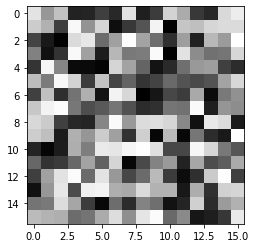

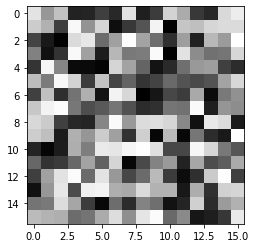

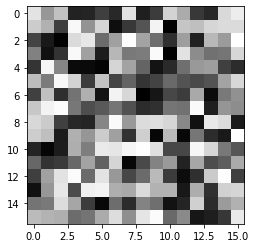

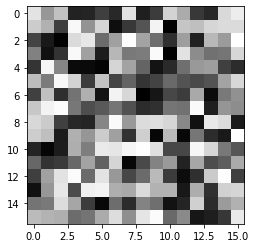

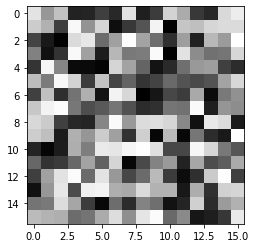

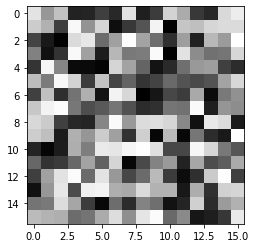

In [32]:
# On affiche l'évolution des poids de w
# On affiche le w initial et pendant les itérations avec les modifications apportées aux poids
for i in range(len(p69m.wLog)) :
    if (i % ((len(p69m.wLog) - 1) / 5) == 0) :
        plt.figure()
        show_usps(np.array(p69m.wLog[i]))

On ne remarque absolument rien sur l'affichage, ce qui était prévisible vu la précision du Perceptron utilisé.

On passe maintenant à l'étude du 6 Versus All en stochastique et mini-batch.

### **6 Versus All - Mode stochastique**

In [33]:
# Isolation des 6 (négatif) et des non 6 (positif) avec get_usps
Xapp, Yapp = dataxapp, datayapp
Xtest, Ytest = dataxtest, dataytest

# On transforme les labels 6 en -1 et les labels restants en +1
Yapp = np.where(Yapp == 6, -1, Yapp)
Yapp = np.where(Yapp != (-1), 1, Yapp)

Ytest = np.where(Ytest == 6, -1, Ytest)
Ytest = np.where(Ytest != (-1), 1, Ytest)

In [41]:
# Création du Perceptron et apprentissage
p6alls = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, eps=0.1, max_iter=1)
p6alls.fit(Xapp, Yapp, mode="stoch")

# Affichage des précisions sur les ensembles d'apprentissage et de test
print("Précision du Perceptron sur les données d'apprentissage :", p6alls.score(Xapp, Yapp))
print("Précision du Perceptron sur les données de test :", p6alls.score(Xtest, Ytest))

Précision du Perceptron sur les données d'apprentissage : 0.9872445480729667
Précision du Perceptron sur les données de test : 0.9835575485799701


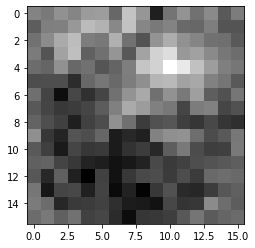

In [48]:
# On affiche les poids du w final
plt.figure()
show_usps(np.array(p6alls.wLog[-1]))

### **6 Versus All - Mode mini-batch**

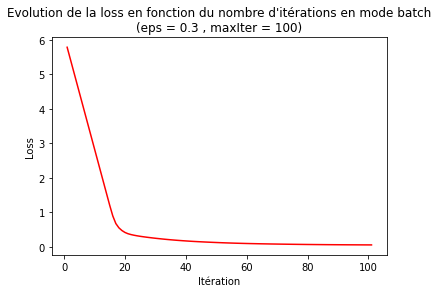

Précision du Perceptron sur les données d'apprentissage : 0.980386778219723
Précision du Perceptron sur les données de test : 0.9755854509217738


In [49]:
# Création du Perceptron et apprentissage
p6allm = Lineaire(loss=perceptron_loss, loss_g=perceptron_grad, eps=0.1)
p6allm.fit(Xapp, Yapp, doPlot=True)

# Affichage des précisions sur les ensembles d'apprentissage et de test
print("Précision du Perceptron sur les données d'apprentissage :", p6allm.score(Xapp, Yapp))
print("Précision du Perceptron sur les données de test :", p6allm.score(Xtest, Ytest))

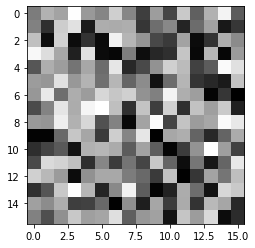

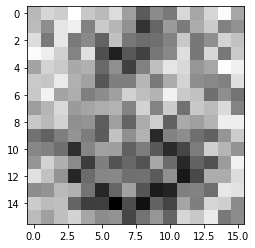

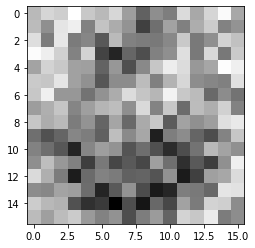

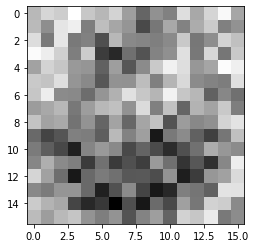

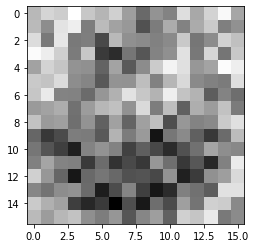

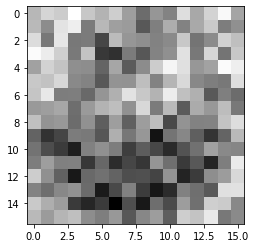

In [50]:
# On affiche l'évolution des poids de w
# On affiche le w initial et pendant les itérations avec les modifications apportées aux poids
for i in range(len(p6allm.wLog)) :
    if (i % ((len(p6allm.wLog) - 1) / 5) == 0) :
        plt.figure()
        show_usps(np.array(p6allm.wLog[i]))